In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("Netflix Userbase.csv")
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


In [9]:
df["Join Date"].astype("datetime64[ns]")

0      2022-01-15
1      2021-05-09
2      2023-02-28
3      2022-10-07
4      2023-01-05
          ...    
2495   2022-07-25
2496   2022-04-08
2497   2022-09-08
2498   2022-12-08
2499   2022-08-13
Name: Join Date, Length: 2500, dtype: datetime64[ns]

In [10]:
df["Join Date"]=df["Join Date"].astype("datetime64[ns]")

In [11]:
df["Join Date"].dtype

dtype('<M8[ns]')

In [13]:
df["Last Payment Date"]=df["Last Payment Date"].astype("datetime64[ns]")

In [14]:
df["Last Payment Date"]

0      2023-10-06
1      2023-06-22
2      2023-06-27
3      2023-06-26
4      2023-06-28
          ...    
2495   2023-12-07
2496   2023-07-14
2497   2023-07-15
2498   2023-12-07
2499   2023-12-07
Name: Last Payment Date, Length: 2500, dtype: datetime64[ns]

In [17]:
pd.DatetimeIndex(df["Last Payment Date"])

DatetimeIndex(['2023-10-06', '2023-06-22', '2023-06-27', '2023-06-26',
               '2023-06-28', '2023-06-27', '2023-06-25', '2023-06-24',
               '2023-06-23', '2023-06-22',
               ...
               '2023-11-07', '2023-12-07', '2023-11-07', '2023-07-15',
               '2023-12-07', '2023-12-07', '2023-07-14', '2023-07-15',
               '2023-12-07', '2023-12-07'],
              dtype='datetime64[ns]', name='Last Payment Date', length=2500, freq=None)

In [20]:
df["Plan Duration"].value_counts()

Plan Duration
1 Month    2500
Name: count, dtype: int64

In [21]:
df.drop("Plan Duration",axis=1,inplace=True)

In [22]:
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device
0,1,Basic,10,2022-01-15,2023-10-06,United States,28,Male,Smartphone
1,2,Premium,15,2021-05-09,2023-06-22,Canada,35,Female,Tablet
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV
3,4,Standard,12,2022-10-07,2023-06-26,Australia,51,Female,Laptop
4,5,Basic,10,2023-01-05,2023-06-28,Germany,33,Male,Smartphone


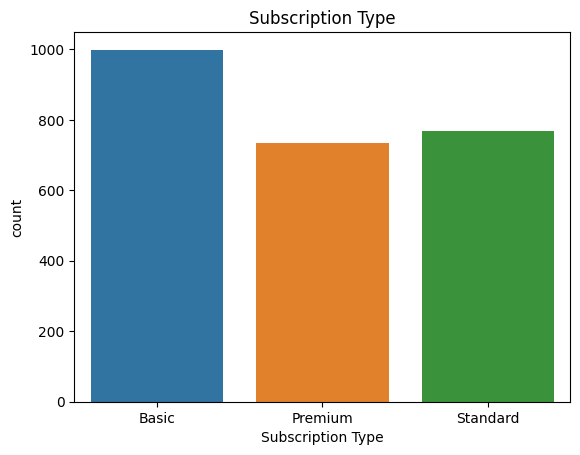

In [27]:
%matplotlib inline

plt.title("Subscription Type")

sns.countplot(df,x="Subscription Type",hue="Subscription Type")
plt.show()

In [31]:
print("Total Revenue",np.sum(df["Monthly Revenue"]))

Total Revenue 31271


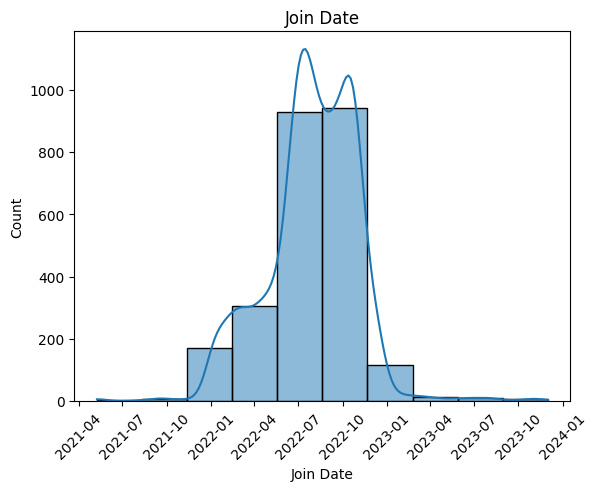

In [36]:
%matplotlib inline
plt.title("Join Date")
sns.histplot(df,x="Join Date",bins=10,kde=True)
plt.xticks(rotation=45)
plt.show()

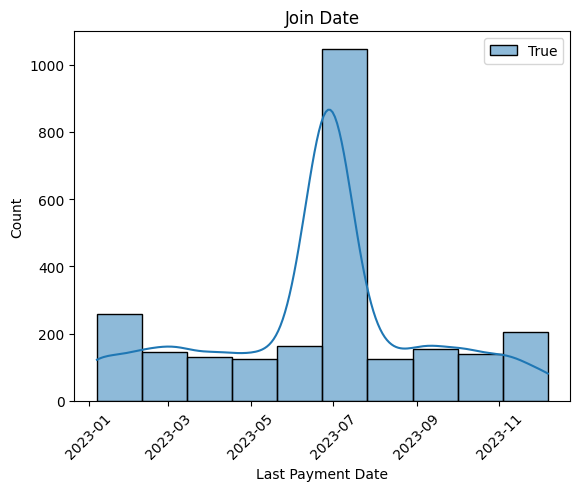

In [38]:
%matplotlib inline
plt.title("Join Date")
sns.histplot(df,x="Last Payment Date",bins=10,kde=True)
plt.xticks(rotation=45)
plt.show()

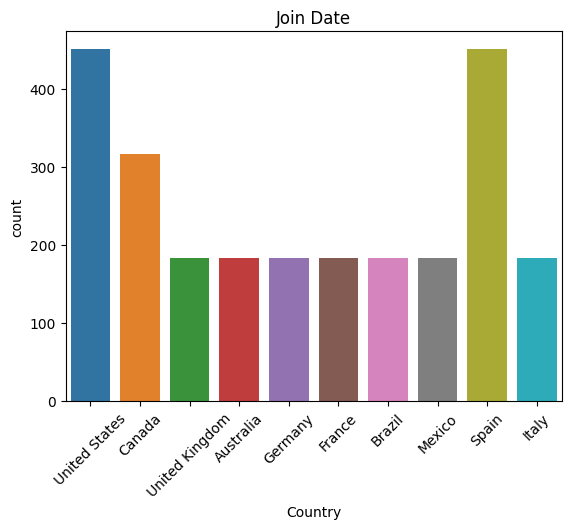

In [42]:
%matplotlib inline
plt.title("Join Date")
sns.countplot(df,x="Country",hue="Country")
plt.xticks(rotation=45)
plt.show()

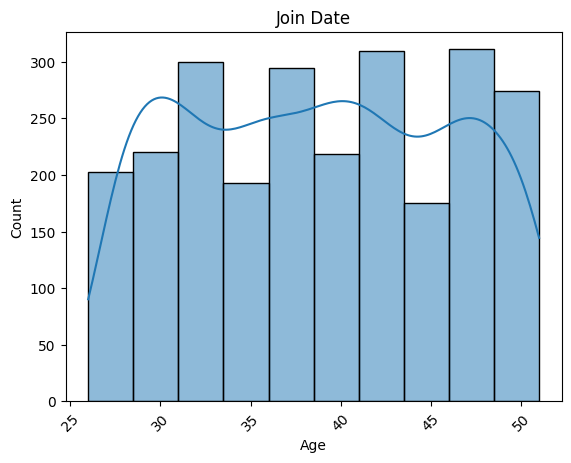

In [43]:
%matplotlib inline
plt.title("Join Date")
sns.histplot(df,x="Age",bins=10,kde=True)
plt.xticks(rotation=45)
plt.show()

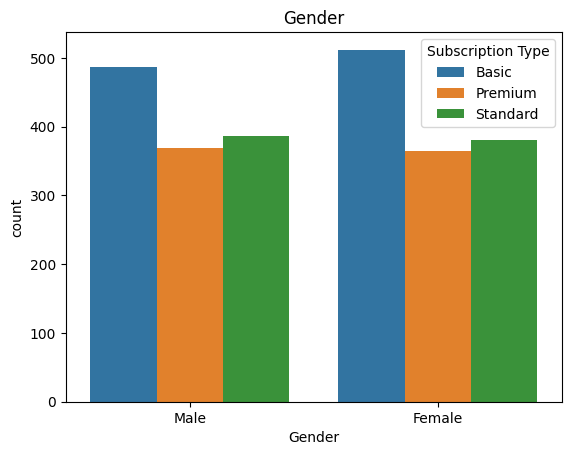

In [54]:
plt.title("Gender")
sns.countplot(df,x="Gender",hue="Subscription Type")
plt.show()

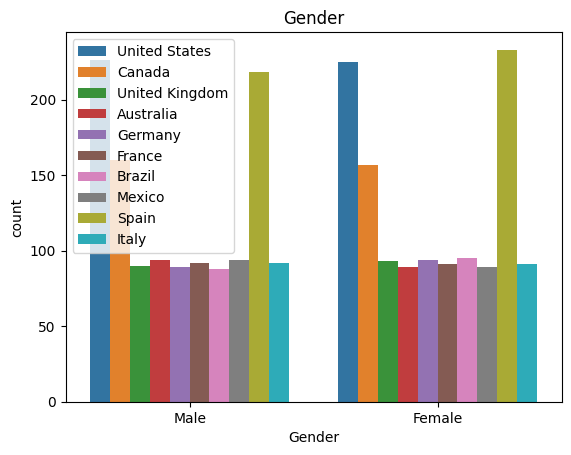

In [52]:
plt.title("Gender")
sns.countplot(df,x="Gender",hue="Country")
plt.legend(loc="upper left")
plt.show()

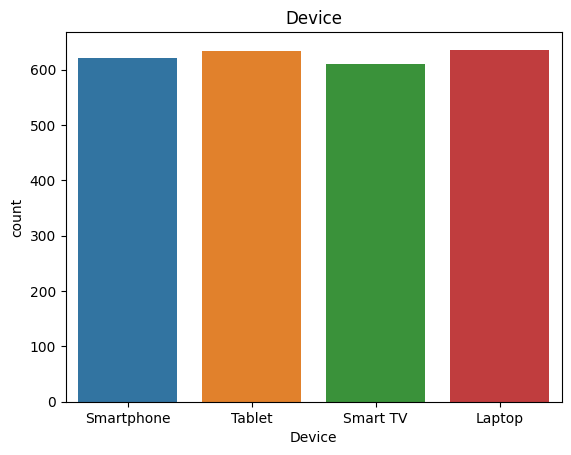

In [56]:
%matplotlib inline
plt.title("Device")
sns.countplot(df,x="Device",hue="Device")
plt.show()

In [58]:
count_sub_type=df["Subscription Type"].value_counts()
count_device=df["Device"].value_counts()
count_country=df["Country"].value_counts()
count_age=df["Age"].value_counts()
count_gender=df["Gender"].value_counts()

In [59]:
count_country

Country
United States     451
Spain             451
Canada            317
United Kingdom    183
Australia         183
Germany           183
France            183
Brazil            183
Mexico            183
Italy             183
Name: count, dtype: int64

In [60]:
count_age

Age
39    116
30    116
28    115
31    115
41    114
47    111
37    107
35    105
29    104
40    103
42    102
48    101
46     99
36     99
49     97
43     94
33     93
51     93
32     92
45     89
38     89
34     88
27     87
44     86
50     84
26      1
Name: count, dtype: int64

In [63]:
pd.crosstab(columns=df["Subscription Type"],index=df["Country"])

Subscription Type,Basic,Premium,Standard
Country,,,
Australia,31,101,51
Brazil,146,33,4
Canada,145,88,84
France,36,147,0
Germany,149,3,31
Italy,176,4,3
Mexico,4,0,179
Spain,110,212,129
United Kingdom,3,0,180


In [65]:
pd.crosstab(columns=df["Gender"],index=df["Subscription Type"])

Gender,Female,Male
Subscription Type,,
Basic,512,487
Premium,364,369
Standard,381,387


In [67]:
pd.crosstab(columns=df["Gender"],index=df["Country"])

Gender,Female,Male
Country,,
Australia,89,94
Brazil,95,88
Canada,157,160
France,91,92
Germany,94,89
Italy,91,92
Mexico,89,94
Spain,233,218
United Kingdom,93,90


In [70]:
df["Age Group"]=pd.cut(df["Age"],bins=5,labels=["26-30","31-35","36-40","41-45","46-more"])

In [71]:
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Age Group
0,1,Basic,10,2022-01-15,2023-10-06,United States,28,Male,Smartphone,26-30
1,2,Premium,15,2021-05-09,2023-06-22,Canada,35,Female,Tablet,31-35
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,41-45
3,4,Standard,12,2022-10-07,2023-06-26,Australia,51,Female,Laptop,46-more
4,5,Basic,10,2023-01-05,2023-06-28,Germany,33,Male,Smartphone,31-35


In [72]:
pd.crosstab(columns=df["Subscription Type"],index=df["Age Group"])

Subscription Type,Basic,Premium,Standard
Age Group,,,
26-30,224,171,143
31-35,175,150,152
36-40,212,144,173
41-45,193,129,148
46-more,195,139,152


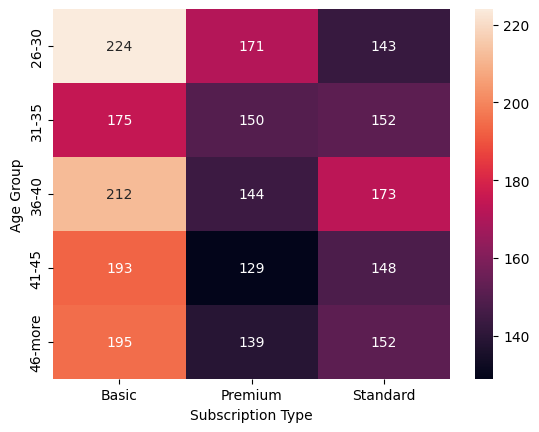

In [82]:
sns.heatmap(pd.crosstab(columns=df["Subscription Type"],
                        index=df["Age Group"]),annot=True,fmt="d")
plt.show()

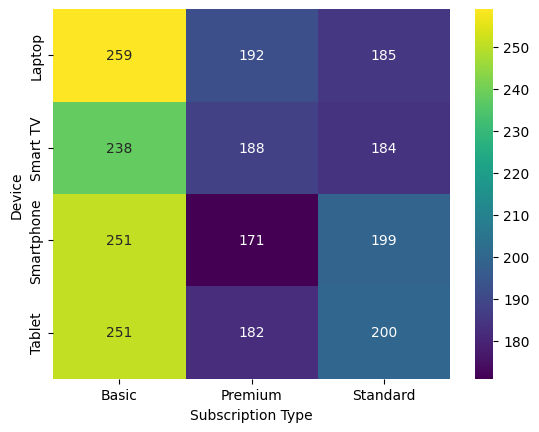

In [86]:
sns.heatmap(pd.crosstab(columns=df["Subscription Type"],
                        index=df["Device"]),annot=True,fmt="d",cmap="viridis")
plt.show()